# Keras를 사용한 개발 과정
1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 훈련 데이터를 정의
2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 네트워크(모델)을 정의
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    
3. 모델 컴파일
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
4. Training(훈련)
    - 모델의 fit() 메소드에 훈련데이터(X,y)를 넣어 Train.
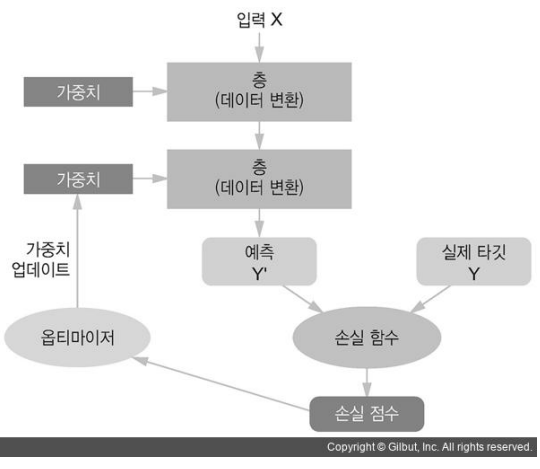

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'1.14.0'

In [3]:
keras.__version__

'2.2.4-tf'

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
type(X_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
y_train.shape, y_test.shape

((60000,), (10000,))

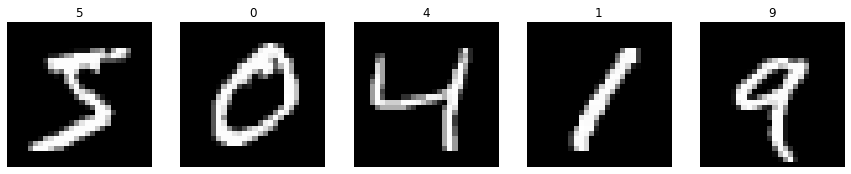

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
# 5개 이미지를 확인
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()

## 신경망 구현

## network : 전체 모델 구조 만들기

In [9]:
# 모델 생성
model = keras.Sequential()

# 층(Layer)를 모델에 추가
model.add(keras.layers.Input((28, 28)))  # 입력층(Input layer)
model.add(keras.layers.Flatten())  # 은닉층(Hidden layer)
model.add(keras.layers.Dense(256, activation='relu'))  # 은닉층(Hidden layer)
model.add(keras.layers.Dense(128, activation='relu'))  # 은닉층(Hidden layer)
model.add(keras.layers.Dense(10, activation='softmax'))  # 출력층(Output layer) - 0~9까지 10개의 후보군이 있으므로 10으로 지정

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [2]:
(784+1)*256, (256+1)*128, (128+1)*10  # (w 개수 + b 개수) * 다음 거

(200960, 32896, 1290)

In [11]:
!pip install pydot pydotplus graphviz 

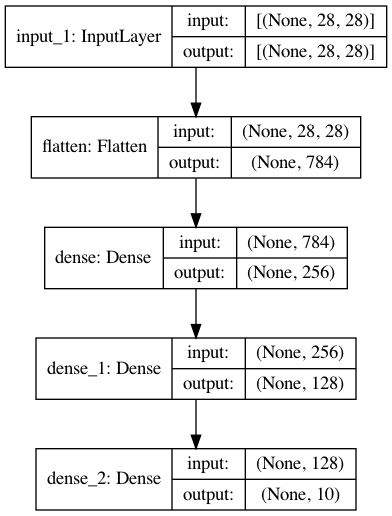

In [13]:
from tensorflow.keras.utils import plot_model
# plot_model(model)
plot_model(model, to_file = 'model.png', show_shapes=True)

## 컴파일 단계
- 구축된 모델에 추가 설정 - 어떻게 학습할 지에 대한 설정
- 손실함수
- Optimizer(최적화 함수)
- 평가지표

In [15]:
model.compile(optimizer='adam',  # Optimizer 등록
              loss='categorical_crossentropy',  # Loss Function 등록['']
              metrics=['accuracy']  # 평가지표 - Training 도중에 Validation 결과를 확인
              )

## 데이터 준비
- X
    - 0 ~ 1 사이의 값으로 정규화 시킨다. 
- y
    - one hot encoding 처리
    - tensorflow.keras 의 to_categorical() 함수 이용

In [16]:
X_train.min(), X_test.max()

(0, 255)

In [17]:
# scaling
X_train = X_train / 255.0
X_test = X_test / 255.0

In [18]:
X_train.min(), X_test.max()

(0.0, 1.0)

In [19]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
# one hot encoding
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [21]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

## 학습 (fit)


In [23]:
model.fit(X_train, y_train,
          epochs = 10,  # epochs = 1: 전체 train dataset을 1번 학습하는 것
          batch_size = 100,  # 파라미터 업데이트(최적화)를 100개마다 처리해라.
          validation_split = 0.2,
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 24us/sample - loss: 0.2840 - acc: 0.9186 - val_loss: 0.1333 - val_acc: 0.9632
Epoch 2/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.1100 - acc: 0.9666 - val_loss: 0.1033 - val_acc: 0.9687
Epoch 3/10
48000/48000 [==============================] - 1s 21us/sample - loss: 0.0713 - acc: 0.9778 - val_loss: 0.1009 - val_acc: 0.9693
Epoch 4/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0514 - acc: 0.9840 - val_loss: 0.0862 - val_acc: 0.9743
Epoch 5/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0362 - acc: 0.9890 - val_loss: 0.0922 - val_acc: 0.9726
Epoch 6/10
48000/48000 [==============================] - 1s 20us/sample - loss: 0.0263 - acc: 0.9923 - val_loss: 0.0820 - val_acc: 0.9766
Epoch 7/10
48000/48000 [==============================] - 1s 22us/sample - loss: 0.0219 - acc: 0.9931 - val_loss: 0.

## 테스트셋 평가

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(test_loss, test_acc)

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0842 - acc: 0.9775
0.08417579501214131 0.9775


### 추론 메소드
- predict()
    - 각 클래스 별 확률 반환
- <del>predict_classes()</del>
    - 클래스(범주값) 반환
    - tensorflow 2.3 부터 deprecated 됨
- 이진 분류(binary classification)
    - `numpy.argmax(model.predict(x) > 0.5).astype("int32")`
- 다중클래스 분류(multi-class classification)
    - `numpy.argmax(model.predict(x), axis=1)`
-     

In [27]:
X_test[:10].shape

(10, 28, 28)

In [30]:
import numpy as np
np.argmax(y_test[:10], axis=-1)  # 정답

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [31]:
# 추론 -> class별 확률
pred = model.predict(X_test[:10])

In [32]:
pred.shape

(10, 10)

In [34]:
np.round(pred, 3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.986, 0.   , 0.   , 0.002, 0.012,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.982, 0.013, 0.   , 0.003,
        0.001],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        1.   ]], dtype=float32)

In [35]:
np.argmax(pred, axis=-1)

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [36]:
model.predict_classes(X_test[:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])